<a href="https://colab.research.google.com/github/hasansingh/1.-EMPLOYEE-SALARY-PREDICTION-A-MACHINE-LEARNING-APPROACH/blob/main/final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data
df=pd.read_csv('/content/drive/MyDrive/ML case Study.csv',header=0)

In [ ]:
# Import college data
colleges=pd.read_csv('/content/drive/MyDrive/Colleges.csv',header=0)

In [ ]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
# Convert colleges data into three categories tier 1,2 and 3 list
Tier1= colleges["Tier 1"].tolist()
Tier2= colleges["Tier 2"].tolist()
Tier3= colleges["Tier 3"].tolist()

In [ ]:
# remove null values
colleges.dropna()


,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


In [ ]:
# Replace the alphabet values of colleges into numerical values(1,2,3) and add values in Employee dataset
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace= True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace= True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace= True)

df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,3,0,60347.0,2,52,28,76764.02,1,0
3,3,0,49010.0,2,81,33,82092.39,1,0
4,1,0,57879.0,4,74,32,73878.10,1,0


In [ ]:
# Import city data
city=pd.read_csv('/content/drive/MyDrive/cities.csv',header=0)

In [ ]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [ ]:
# Convert data into metro and non metro city list
Metro_city=city["Metrio City"].tolist()
Nonmetro_city=city["non-metro cities"].tolist()

In [ ]:
# Drop null values
city.dropna()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer


In [ ]:
# Replace the alphabet values into numerical values (0,1) and add values in Employee dataset
for item in df.City:
    if item in Metro_city:
        df["City"].replace(item,1,inplace= True)
    elif item in Nonmetro_city:
        df["City"].replace(item,0,inplace= True)
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,3,0,60347.0,2,52,28,76764.02,1,0
3,3,0,49010.0,2,81,33,82092.39,1,0
4,1,0,57879.0,4,74,32,73878.10,1,0


In [ ]:
# get dummies variables of Role in int data type

df=pd.get_dummies(df, columns=['Role'], dtype=int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Executive       1589 non-null   int64  
 8   Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 111.9 KB


In [ ]:
#   Check for null values in dataset
df.isnull().sum()

,0
College,0
City,0
Previous CTC,0
Previous job change,0
Graduation Marks,0
EXP (Month),0
CTC,0
Role_Executive,0
Role_Manager,0


In [ ]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


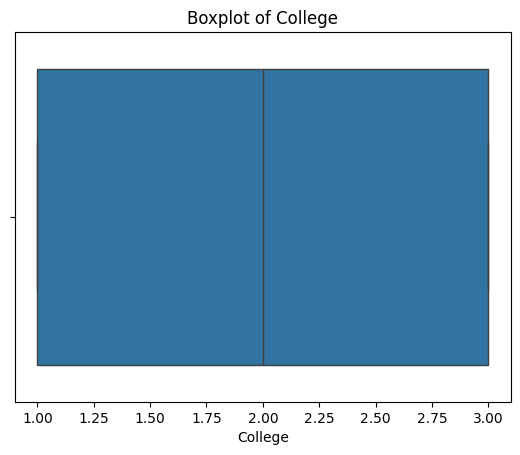

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


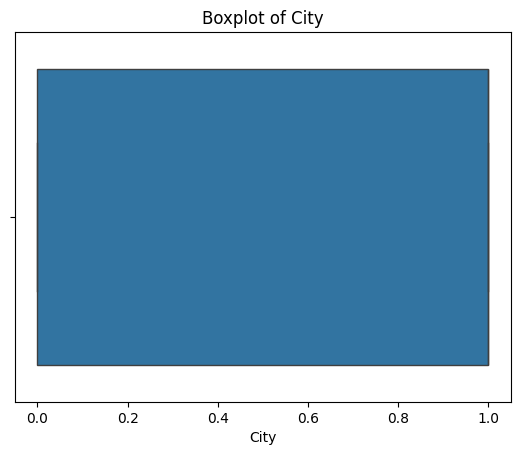

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


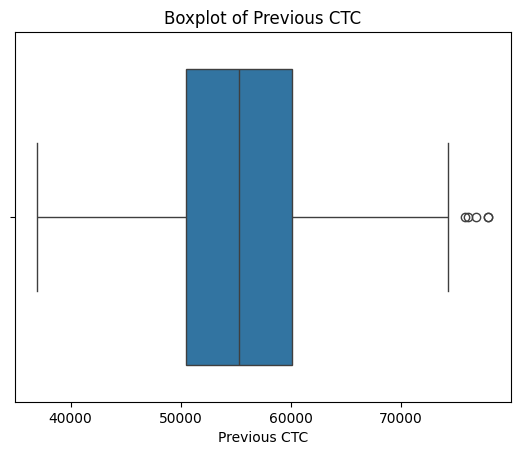

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


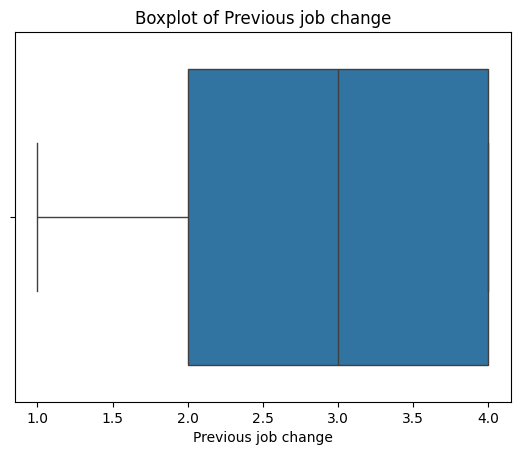

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


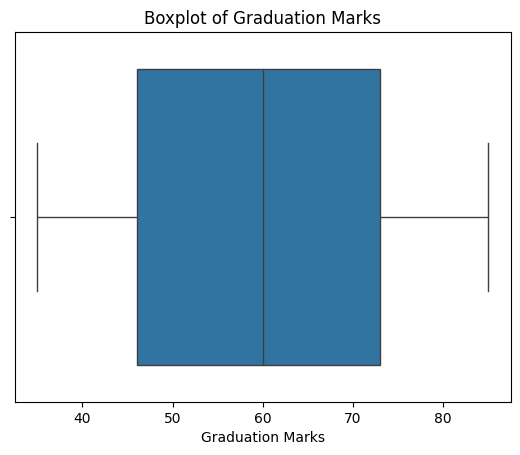

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


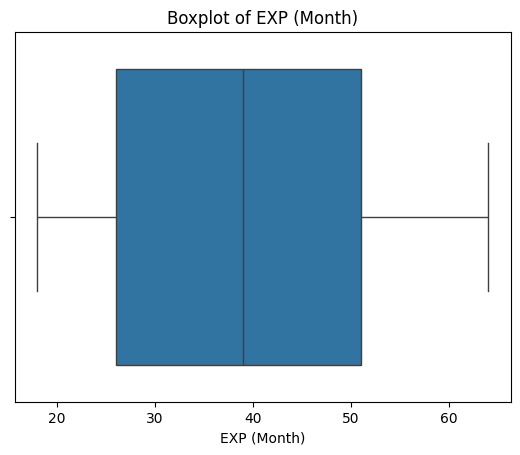

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


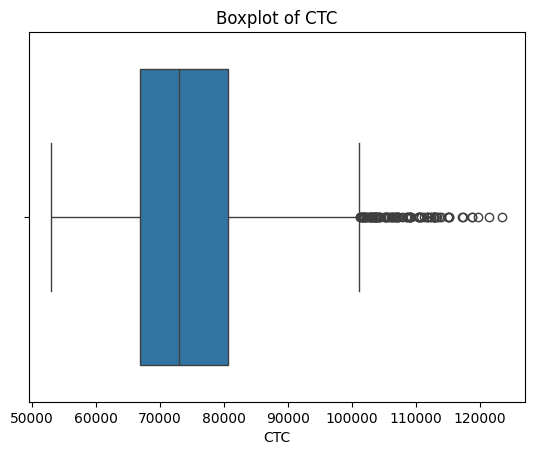

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


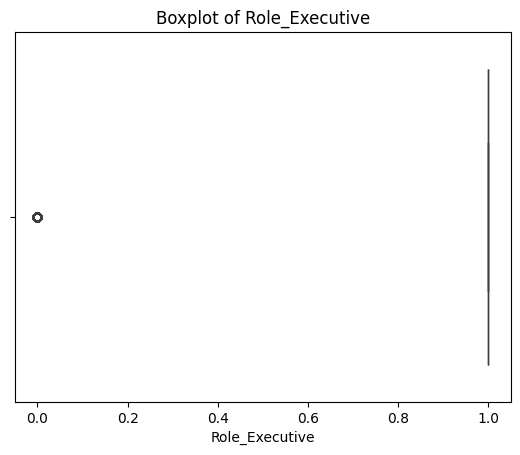

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


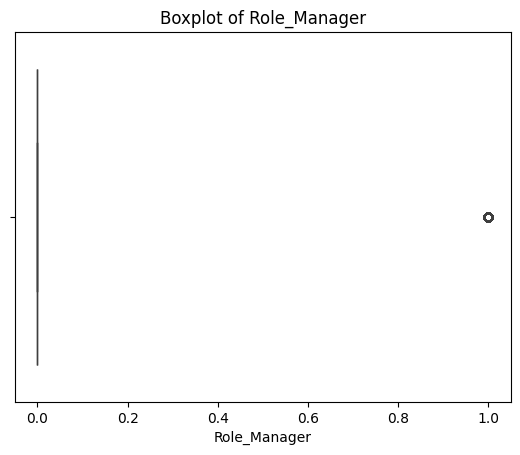

In [ ]:
# Check outliers
# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

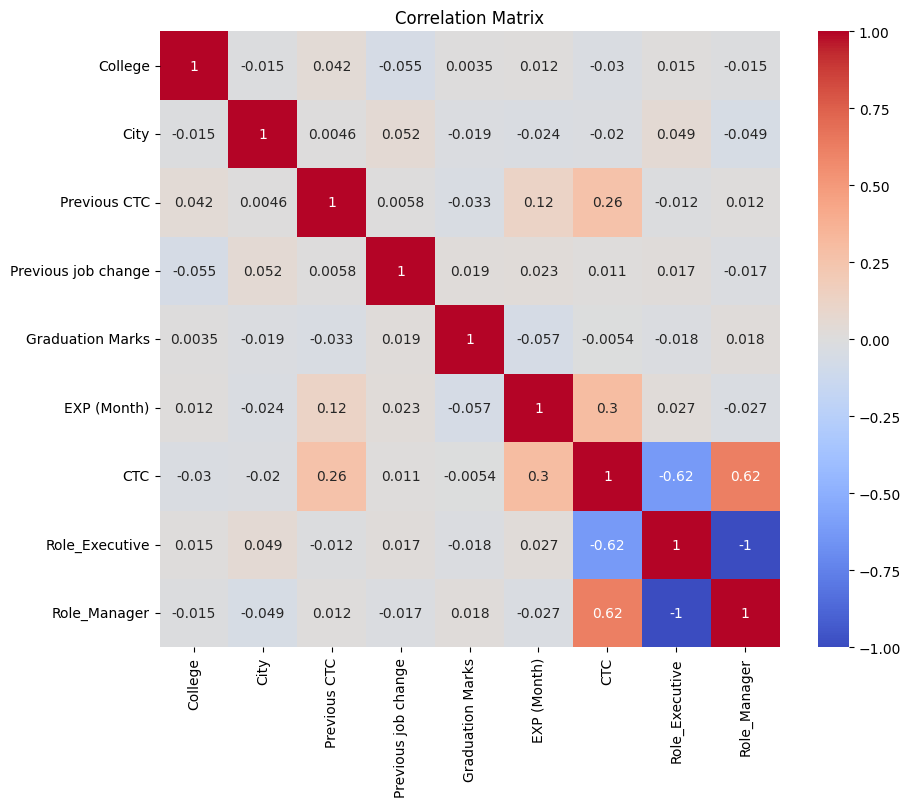

In [ ]:
# Find correlation
correlation_matrix = df.corr()
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', cbar=True)

# Add title and labels
plt.title("Correlation Matrix")
plt.show()

# Linear regression using Statsmodel

In [ ]:
# Import statsmodel
import statsmodels.api as sm

# declare x and y variables
x=df.drop("CTC",axis=1)
y=df["CTC"]

# add constant to x
x_con = sm.add_constant(x)

# fit the model
lm = sm.OLS(y,x_con).fit()

# print the summary
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.70e-257
Time:                        06:04:32   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1

# Linear regression using sklearn

In [ ]:
# import sklearn

from sklearn.linear_model import LinearRegression

# declare x and y variables

x=df.drop("CTC",axis=1)
y=df["CTC"]

# create a linear regression object
lm1 = LinearRegression()

# fit the model
lm1.fit(x, y)

# print the coefficients
print('Coefficients:', lm1.coef_)

# print the intercept
print('Intercept:', lm1.intercept_)

Coefficients: [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]
Intercept: 48164.823735802136


# Multiple linear regression

In [ ]:
# import statsmodel
import statsmodels.api as sm

#declare x_multi and y_multi variables

x_multi= df.drop("CTC", axis=1)
y_multi= df["CTC"]

# Add constant to x_multi

x_multi_cons = sm.add_constant(x_multi)

# fit the model
lm_multi = sm.OLS(y_multi, x_multi_cons).fit()

# print the summary
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.70e-257
Time:                        06:04:33   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1

## Multi linear regression using sklearn

In [ ]:
# multi linear regression
# import sklearn
from sklearn.linear_model import LinearRegression

#declare x_multi and y_multi variables

x_multi= df.drop("CTC", axis=1)
y_multi= df["CTC"]

# create a linear regression object
lm_multi1 = LinearRegression()

# fit the model
lm_multi1.fit(x_multi, y_multi)

# print the coefficients
print('Coefficients:', lm_multi1.coef_)

# print the intercept
print('Intercept:', lm_multi1.intercept_)

Coefficients: [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]
Intercept: 48164.823735802136


## Performance measure in linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Selecting features and target variable
x = df.drop("CTC", axis=1)  # Use all features except 'quality' for prediction
y = df["CTC"]

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
lm = LinearRegression()

# Training the model
lm.fit(x_train, y_train)

# Predicting on training and testing sets
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

# Calculating r_2 scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

# Calculating mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print r2_score_train
print('r2_score_train:', r2_score_train)

# Print r2_score_test
print('r2_score_test:', r2_score_test)
print()
# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)

r2_score_train: 0.513774714213484
r2_score_test: 0.5933517958385074

mse_train: 73096299.0275134
mse_test: 77362774.94956572


# Ridge

In [ ]:
from sklearn import preprocessing

# Standardize the data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)        # transform x_train into scaler
x_test_s = scaler.transform(x_test)

# import Ridge
from sklearn.linear_model import Ridge

# Create object
ridge = Ridge(0.5)


# Fit the model
ridge.fit(x_train_s, y_train)

# find r2_score
r2_score_Ridge_train = r2_score(y_train, ridge.predict(x_train_s))
r2_score_Ridge_test= r2_score(y_test, ridge.predict(x_test_s))

# Print r2_score_Ridge
print('r2_score_Ridge_train:', r2_score_Ridge_train)
print('r2_score_Ridge_test:', r2_score_Ridge_test)
print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train, ridge.predict(x_train_s))
mse_test = mean_squared_error(y_test, ridge.predict(x_test_s))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_Ridge_train: 0.5137746805678054
r2_score_Ridge_test: 0.5933113651558903

mse_train: 73096304.08561024
mse_test: 77370466.68352237


# Lasso

In [ ]:
# Import Lasso model
from sklearn.linear_model import Lasso

# Create object
Model_lasso= Lasso(alpha=0.5)

# Fit the model
Model_lasso.fit(x_train,y_train)

# Calculate r2_scores
r2_score_Lasso_train = r2_score(y_train, Model_lasso.predict(x_train))
r2_score_Lasso_test = r2_score(y_test, Model_lasso.predict(x_test))

# Print r2_scores
print('r2_score_Lasso_train:', r2_score_Lasso_train)
print('r2_score_Lasso_test:', r2_score_Lasso_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,  Model_lasso.predict(x_train))
mse_test = mean_squared_error(y_test,  Model_lasso.predict(x_test))

# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_Lasso_train: 0.5137746928077733
r2_score_Lasso_test: 0.5933274629610132

mse_train: 73096302.24552421
mse_test: 77367404.1570876


# Decision tree

In [ ]:
# import
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn import tree

# Create object
regtree = tree.DecisionTreeRegressor(max_depth = 3)

# Fit the model
regtree.fit(x_train,y_train)

# Predict values
y_train_pred = regtree.predict(x_train)
y_test_pred = regtree.predict(x_test)

# Calculate r2_scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

# Print r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.6062958846879378
r2_score_test: 0.5949148978491665

mse_train: 59187201.04130625
mse_test: 77065402.65617718


## Plotting decision tree

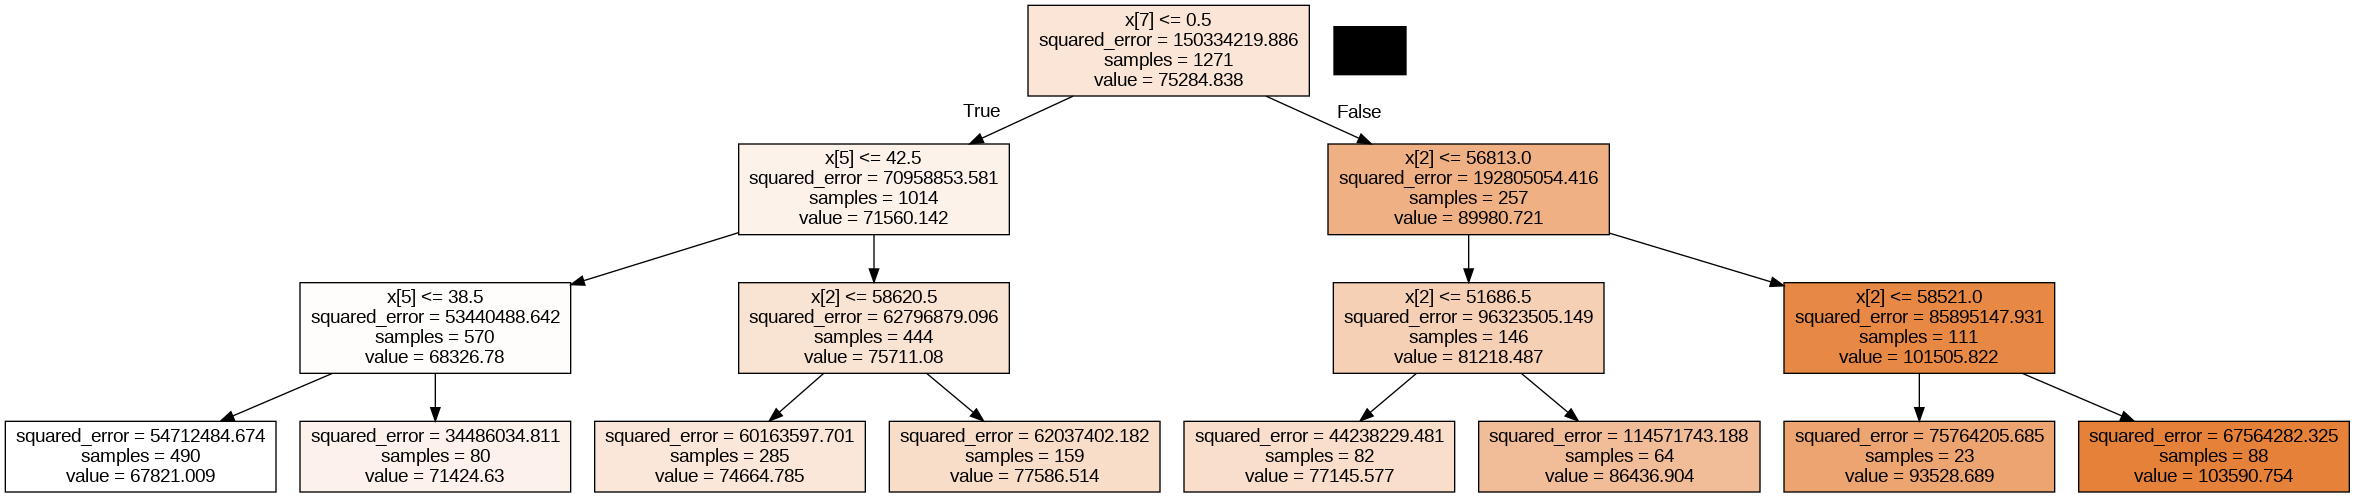

In [ ]:
import graphviz
from IPython.display import Image
import pydotplus

# Plot decision tree
dot_data = tree.export_graphviz(regtree, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


## Pruning decision tree

### Minimum observation at internal node

In [ ]:
#  Minimum observation at internal node

#create object
regtree2 = tree.DecisionTreeRegressor(min_samples_leaf = 50)

# Fit the model
regtree2.fit(x_train,y_train)

dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names=x_train.columns, filled=True)
# predict r2_score
r2_score_train = r2_score(y_train, regtree2.predict(x_train))
r2_score_test = r2_score(y_test, regtree2.predict(x_test))

# print r2_score
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,regtree2.predict(x_train))
mse_test = mean_squared_error(y_test, regtree2.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.6152825850315844
r2_score_test: 0.6070347928842399

mse_train: 57836192.45579583
mse_test: 74759653.60228886


### Minimum observation at leaf node


In [ ]:
# Minimum observation at leaf node

# create object
regtree1 = tree.DecisionTreeRegressor(min_samples_leaf = 30, max_depth= 4)

# Fit the model
regtree1.fit(x_train,y_train)

# predict r2_score
r2_score_train = r2_score(y_train, regtree1.predict(x_train))
r2_score_test = r2_score(y_test, regtree1.predict(x_test))

# print r2_score
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train, regtree1.predict(x_train))
mse_test = mean_squared_error(y_test, regtree1.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.6235117602427134
r2_score_test: 0.6216992822461425

mse_train: 56599065.82012639
mse_test: 71969808.27985723


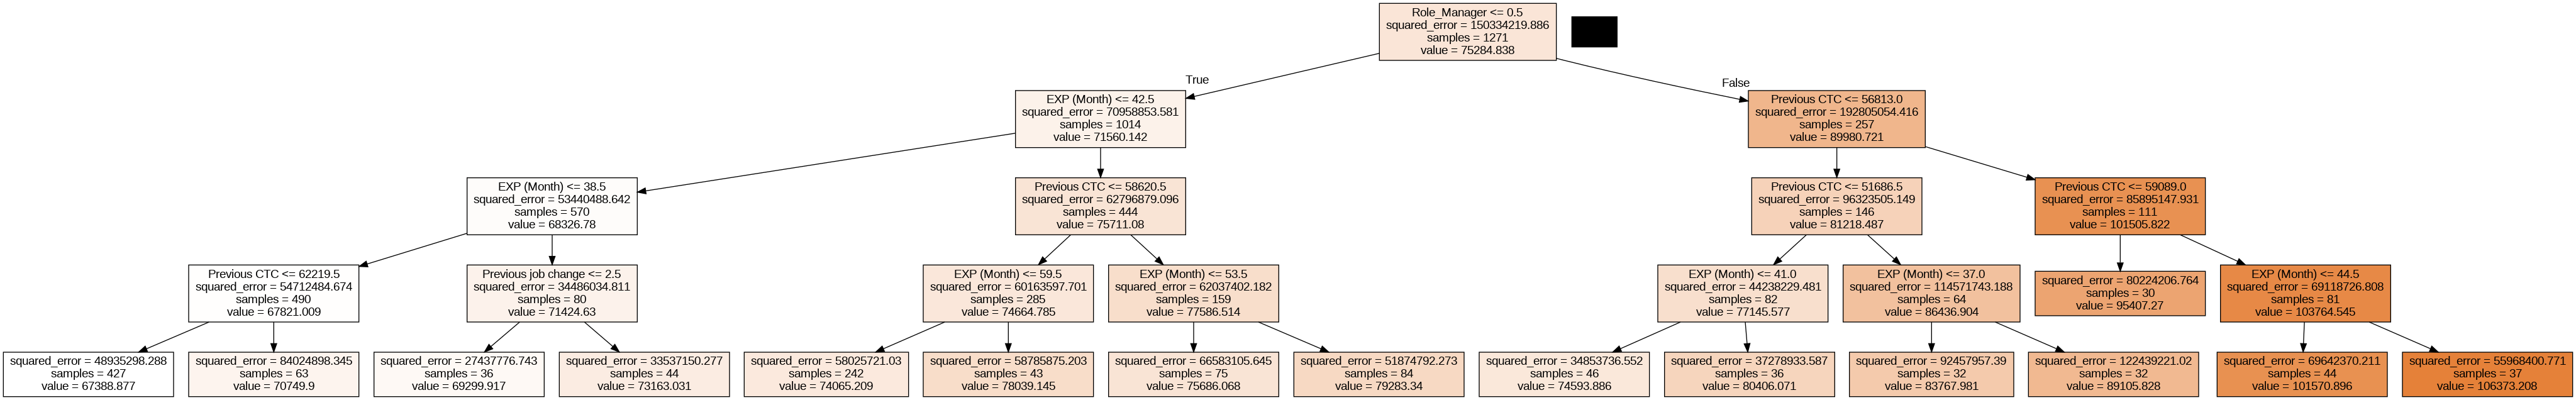

In [ ]:
# Plotting the above decision tree
dot_data1 = tree.export_graphviz (regtree1, out_file = None, feature_names= x_train.columns , filled = True)

graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

# k-nearest neighbors (KNN)

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,  mean_squared_error

# Standardize the data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)        # transform x_train into scaler
x_test_s = scaler.transform(x_test)

# create object
knn = KNeighborsRegressor(n_neighbors=10)

# Fit the model
knn.fit(x_train_s, y_train)

# calculate r2_score
r2_score_knn_train = r2_score(y_train, knn.predict(x_train_s))
r2_score_knn_test = r2_score(y_test, knn.predict(x_test_s))

# print r2_score
print('r2_score_knn_train:', r2_score_knn_train)
print('r2_score_knn_test:', r2_score_knn_test)

print()
# calculate mean squared error
mse_knn_train = mean_squared_error(y_train, knn.predict(x_train_s))
mse_knn_test = mean_squared_error(y_test, knn.predict(x_test_s))

# print mean squared error
print('mse_knn_train:', mse_knn_train)
print('mse_knn_test:', mse_knn_test)


r2_score_knn_train: 0.6207856132681338
r2_score_knn_test: 0.6226788892657358

mse_knn_train: 57008898.9988441
mse_knn_test: 71783442.972891


## Bagging

In [ ]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor


# Create object
regtree = tree.DecisionTreeRegressor()

# Selecting features and target variable
x = df.drop("CTC", axis=1)  # Use all features except 'quality' for prediction
y = df["CTC"]

# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create bagging object
bag_reg = BaggingRegressor( estimator = regtree, n_estimators = 1000, bootstrap= True,n_jobs= -1, random_state= 42)

# Fit the model
bag_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, bag_reg.predict(x_train))
r2_score_test = r2_score(y_test, bag_reg.predict(x_test))

# Print r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train, bag_reg.predict(x_train))
mse_test = mean_squared_error(y_test, bag_reg.predict(x_test))

# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.9507994919031745
r2_score_test: 0.6610509833031002

mse_train: 7912864.0190808335
mse_test: 50294750.41002087


# Random forest method

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create object
rf_reg = RandomForestRegressor( n_estimators = 100, n_jobs = -1, random_state = 42)

# Fit the model
rf_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, rf_reg.predict(x_train))
r2_score_test = r2_score(y_test, rf_reg.predict(x_test))

# Print the r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,  rf_reg.predict(x_train))
mse_test = mean_squared_error(y_test, rf_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.9481367418155077
r2_score_test: 0.6577072384302154

mse_train: 8341111.209517122
mse_test: 50790910.02557424


## Random forest with tuned parameters

In [ ]:

# Create object with  tuned parameter
rf_reg = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Maximum depth of the tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Fit the model
rf_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, rf_reg.predict(x_train))
r2_score_test = r2_score(y_test, rf_reg.predict(x_test))

# Print the r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train, rf_reg.predict(x_train))
mse_test = mean_squared_error(y_test, rf_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.7292338651618391
r2_score_test: 0.6137911038356807

mse_train: 43547021.94802562
mse_test: 57307379.81778532


## Random forest with tuned parameters and using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create object
rf_reg = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of the tree (control tree complexity)
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=10,  # Minimum number of samples required to be at a leaf nod
    max_features='sqrt',
    n_jobs=-1,
    random_state=10
)
# create dictionary
params_grid = { "max_features" : [4,5,6,7,8,9,10],
               "min_samples_split" : [2,3,10]}

# create grid object
grid_search = GridSearchCV(rf_reg, params_grid, n_jobs= -1, cv=5, scoring='r2')

# fit the model
grid_search.fit(x_train , y_train)


cvrf_reg = grid_search.best_estimator_
# calculate r2_score
r2_score(y_test, cvrf_reg.predict(x_test))

# print r2_score
print('r2_score_train:', r2_score(y_train, cvrf_reg.predict(x_train)))
print('r2_score_test:', r2_score(y_test, cvrf_reg.predict(x_test)))

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,cvrf_reg.predict(x_train))
mse_test = mean_squared_error(y_test, cvrf_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.7127197974666821
r2_score_test: 0.6265376962261141

mse_train: 46202961.43175027
mse_test: 55415984.205835834


### Random Forest Regressor with tuned parameters

In [ ]:
# Initialize the Random Forest Regressor with tuned parameters
rf_regressor_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    min_samples_split=50,
    min_samples_leaf=4,
    random_state=42
)

# Train the model
rf_regressor_tuned.fit(x_train, y_train)

# Predict the test and training result
y_pred_test_rf_tuned = rf_regressor_tuned.predict(x_test)
y_pred_train_rf_tuned = rf_regressor_tuned.predict(x_train)

# Evaluate the model with r2 score
r2_test_rf_tuned = r2_score(y_test, y_pred_test_rf_tuned)
r2_train_rf_tuned = r2_score(y_train, y_pred_train_rf_tuned)

print('r2_train_tuned:',r2_train_rf_tuned)
print('r2_test_tuned:',r2_test_rf_tuned)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,y_pred_train_rf_tuned)
mse_test = mean_squared_error(y_test, y_pred_test_rf_tuned)


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)

r2_train_tuned: 0.6670520753845963
r2_test_tuned: 0.6213250805112298

mse_train: 53547651.33181322
mse_test: 56189455.121663556


 ## Using  Another Gridsearchcv in random forest method

In [ ]:
# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(n_estimators=250,n_jobs=-1, random_state=42)

# Define dictionary
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2,],
    'min_samples_leaf': [1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)


cvrf_reg = grid_search.best_estimator_
# calculate r2_score
r2_score(y_test, cvrf_reg.predict(x_test))

# print r2_score
print('r2_score_train:', r2_score(y_train, cvrf_reg.predict(x_train)))
print('r2_score_test:', r2_score(y_test, cvrf_reg.predict(x_test)))

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,cvrf_reg.predict(x_train))
mse_test = mean_squared_error(y_test, cvrf_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.9496437603603698
r2_score_test: 0.6612316127344173

mse_train: 8098739.061728339
mse_test: 50267947.81813455


# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create object
gb_reg = GradientBoostingRegressor(learning_rate= 0.01, n_estimators = 750 , max_depth= 5)

# Fit the model
gb_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, gb_reg.predict(x_train))
r2_score_test = r2_score(y_test, gb_reg.predict(x_test))

# Print r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,gb_reg.predict(x_train))
mse_test = mean_squared_error(y_test,gb_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)

r2_score_train: 0.8363955436020751
r2_score_test: 0.6340391365053524

mse_train: 26312326.16225658
mse_test: 54302887.40373669


# Ada boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create object
ada_reg = AdaBoostRegressor(learning_rate=0.01,n_estimators= 750)

# Fit the model
ada_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, ada_reg.predict(x_train))
r2_score_test = r2_score(y_test, ada_reg.predict(x_test))

# Print r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,ada_reg.predict(x_train))
mse_test = mean_squared_error(y_test,ada_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.6252594821120934
r2_score_test: 0.5984676503919935

mse_train: 60269108.49480146
mse_test: 59581141.44093531


## ada boosting using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7 ,10,6],
    'min_samples_split': [20,30,40,50,60],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object
grid_search.fit(x_train, y_train)

# Get the best estimator from the GridSearchCV
best_rf_reg = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred_test = best_rf_reg.predict(x_test)

# Calculate the R-squared score on the test data
r2_test = r2_score(y_test, y_pred_test)

# Print the R-squared score
print('r2_score_train:' , r2_score(y_train, best_rf_reg.predict(x_train)))
print("r2_score_test", r2_test)

print()
print("Best parameters:", grid_search.best_params_)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,best_rf_reg.predict(x_train))
mse_test = mean_squared_error(y_test,best_rf_reg.predict(x_test))

# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.6855410377687896
r2_score_test 0.6194866673895145

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}

mse_train: 50574091.690678924
mse_test: 56462246.971034415


## using random forest regressor in ada boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create object
ada_reg = AdaBoostRegressor(rf_reg, learning_rate=0.02,n_estimators= 400)

# Fit the model
ada_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, ada_reg.predict(x_train))
r2_score_test = r2_score(y_test, ada_reg.predict(x_test))

# Print r2_scores
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,ada_reg.predict(x_train))
mse_test = mean_squared_error(y_test,ada_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.9698360392708006
r2_score_test: 0.6688684615645313

mse_train: 4851236.88270302
mse_test: 49134758.49788608


# XGBoost

In [ ]:
import xgboost as xgb

# Create object
xgb_reg = xgb.XGBRegressor( max_depth = 20, n_estimators = 500, learning_rate= 0.01,
          n_jobs= -1,subsample=0.8, random_state=42,reg_alpha=0.1,
                            colsample_bytree=0.8)

# fit the model
xgb_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, xgb_reg.predict(x_train))
r2_score_test = r2_score(y_test, xgb_reg.predict(x_test))

# Print r2_score
print('r2_score_train:', r2_score_train)

print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,xgb_reg.predict(x_train))
mse_test = mean_squared_error(y_test,xgb_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.9954151779423813
r2_score_test: 0.6692184510107106

mse_train: 737371.9275870597
mse_test: 49082825.51984333


## XGBoost with tuned parameters and using GridSearchCV

In [ ]:
# Create object
xgb_reg1 = xgb.XGBRegressor( max_depth = 10, n_estimators = 400, learning_rate= 0.02,
          n_jobs= -1,subsample=0.8, random_state=42,reg_alpha=0.1,
                            colsample_bytree=0.8)



# Create dictionary
params_test = {
    'n_estimators':range(100,150,700),
    'max_depth':range(2,10,2),
    'gamma': [0.1, 0.2, 0.3, 0.4],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9]
}

# Create grid object
grid_search = GridSearchCV(xgb_reg1, params_test, n_jobs= -1, cv=5, scoring= 'r2')

# Fit the model
grid_search.fit(x_train, y_train)

# calculate the r2_scores
r2_score_train = r2_score(y_train, grid_search.predict(x_train))
r2_score_test = r2_score(y_test, grid_search.predict(x_test))

# Print the r2_score
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,grid_search.predict(x_train))
mse_test = mean_squared_error(y_test,grid_search.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.7518295020294052
r2_score_test: 0.6312828084732696

mse_train: 39912990.33181317
mse_test: 54711883.51699497


## XGBoost with tuned parameters

In [ ]:
# Create object
xgb_reg = xgb.XGBRegressor(
    n_estimators=130, #Increase number of estimators
    learning_rate=0.02,  # Reduce learning rate for more gradual learning
    max_depth=6,  # Reduce maximum depth of trees to prevent overfitting
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42  # Set a random state for reproducibility
)

# fit the model
xgb_reg.fit(x_train, y_train)

# Calculate r2_scores
r2_score_train = r2_score(y_train, xgb_reg.predict(x_train))
r2_score_test = r2_score(y_test, xgb_reg.predict(x_test))

# Print r2_score
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

print()
# Calculating mean squared error
mse_train = mean_squared_error(y_train,xgb_reg.predict(x_train))
mse_test = mean_squared_error(y_test,xgb_reg.predict(x_test))


# Print mean squared error
print('mse_train:', mse_train)
print('mse_test:', mse_test)

r2_score_train: 0.7969414056479865
r2_score_test: 0.6454616203922419

mse_train: 32657692.108607497
mse_test: 52607968.85299984


# Question

1. Your views about the problem statement?
2. What will be your approach to solving this task?
3. What were the available ML model options you had to perform this task?
4. Which model’s performance is best and what could be the possible reason for that?
5. What steps can you take to improve this selected model’s performance even further?








# Answers

Ques 1. Your views about the problem statement?

Ans 1. My views about the problem statement:
* We have to create a machine learning model for TechWork consulting team which will help them in determining
the salary employees using the given data.

* So basically we have to use machine learning to predict salary using some factors such as education level, past job experience,certifications, location, etc.

* So, we will be using machine learning to predict employee salary so that it can help to ensure
that salary is fair and accurate  among different employees.

* For that we have to use regression model so that we can make data-driven decisions about salary, instead of depending on variables like  estimating the salary on some assumptions.

* Hence, we have to look at dataset and analyse what changes we have to make in dataset after importing it in Collab or jupyter notebook and machine learning process.


Ques 2. What will be your approach to solving this task?

Ans 2. My apporoach to solve this task is that,firstly we have to data processing:

* First we have to covert the college and city categorical data into numerical data, and then insert that data into employees data table.

* Then create dummy variables and find outliers in data.

* Also we have to do EDA process and find is there any null values present in the dataset and treat it.

* As after treating the outliners, data accuracy is declining beacuse outliners were quite small,so i didn't treated them to increase  model performance.

* Then we have use different models and find out the best model depending on the model performance( performance measures such as Mean-squared error(MSE) and  R-Squared(r2_score) )











Ques 3. What were the available ML model options you had to perform this task?

Ans 3.  Available ML model options to perform this task:
1. Linear regression using Statsmodel library
2. Linear regression using sklearn library
3. Multiple linear regression
4. Ridge regression
5. Lasso regression
6. Regression decision tree
7. k-nearest neighbors (KNN)
8. Bagging method
9. Random forest method
10. Gradient Boosting
11. Ada boost
12. Xgboost


4. Which model’s performance is best and what could be the possible reason for that?

Ans. XGBoost( extreme gradient boosting ) is best model because it's performance is best amomg all other models.
* Although xgboost is giving higher r2_score(66.9%) without tuned( example-r2_score_train: 0.9954151779423813
r2_score_test: 0.6692184510107106) but in this case there is an overfitting issue (as training score is 99).

* That's why after doing tuning of parameters in the xgboost, got the best performance result - r2_score_train: 0.7969414056479865
r2_score_test: 0.6454616203922419. Although here is also some overfitting but it's best among rest of the other's.

* * XGB model performance is better because it can effectively handle complex relationship and ability to build deep trees.
 * XGB model also have regularization methods to prevent overfitting and can efficient do computation for better performance.

5. What steps can you take to improve this selected model’s performance even further?

Ans. Steps to improve model's performance further:

* 1. Hyperparameter Tuning:
  *   Try a different  range of hyperparameter values for the XGBoost model, such as:
  * n_estimators (number of trees): Try different values to find the optimal balance between model complexity and performance.

  * learning_rate: Adjust the learning rate to control the step size and improve intersecrion.

  * max_depth (maximum tree depth): Find the favorable depth of trees to prevent overfitting.

  * subsample and colsample_bytree: Tune these parameters to control the fraction of samples and features used during training.

  * gamma: Find the minimum loss reduction required to make a split for better performance.

  * Regularization parameters (reg_alpha, reg_lambda): Experiment with different values to control model complexity and prevent overfitting, and get improved and accurate performance.

* 2. Cross-Validation:
  * Use more robust cross-validation techniques such as k-fold cross-validation to avoid overfitting to specific training data folds and
 evaluate the model's performance more accurately.

* 3.  Use more Ensemble methods:
  * Combine multiple XGBoost models trained with different hyperparameters or on different subsets of data using ensemble methods such as ada or bagging, to improve model predictive power and accuracy.
  
* 4. Feature Selection:
   * Using feature selection methods to identify the most relevant features for predicting CTC and remove irrelevant or redundant features that can improve model performance.  

* 5. Using some more GridSearchCV in XGB with some different hyperparameters and params(dictionary).

* 6. We can also do data augmentation which is to increase the size of dataset. As smaller dataset give small performance score(r2_score) we can use a larger dataset to improve the model's performance.
